In [1]:
import numpy as np

from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

import matilda
import matilda.prototyping
import matilda.harmonic


In [2]:
SAVEFIG = False


## Example 2

In [3]:
simplices = [
    [0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [0, 1],
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [1, 5],
    [1, 2, 3],
    [1, 4],
    [3, 4],
    [1, 3, 4],
]

coord_vertices = [[1 / 2, -1], [1, 0], [0, 0], [1 / 2, 1], [1, 1], [1.5, -1 / 2]]


simplices = [np.array(s) for s in simplices]


K = matilda.prototyping.FilteredSimplicialComplex(
    dimension=2,
    simplices=simplices,
    simplices_indices=[i for i in range(len(simplices))],
    appears_at=[i for i in range(len(simplices))],
)


<Axes: >

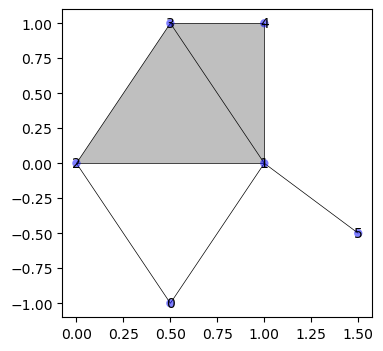

In [4]:
plotter = matilda.plot.Plotter()

fig, ax = plt.subplots(ncols=1, figsize=(4, 4))

plotter.plot_2skel(
    K,
    max_id=99,
    pos={i: p for i, p in enumerate(coord_vertices)},
    labels=[str(i[0]) for i in simplices if len(i) == 1],
    this_ax=ax,
)


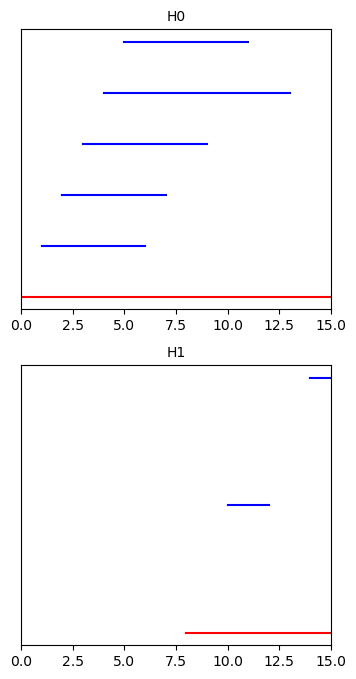

In [5]:
homology_computer = matilda.PersistentHomologyComputer()

homology_computer.compute_persistent_homology(K, with_representatives=True, modulus=0)

plotter = matilda.plot.Plotter()
fig, ax = plotter.plot_barcode(
    homology_computer,
    dimension=[d for d in range(K.dimension)],
    figsize=(4, 4 * K.dimension),
)


In [6]:
for k, v in homology_computer.bars.items():
    if k > 1:
        break
    print("Bars of dimension {}".format(k))
    for kk, vv in v.items():
        print("{}:{}".format(kk, vv))


Bars of dimension 0
0:[0.0, inf]
1:[1.0, 6.0]
2:[2.0, 7.0]
3:[3.0, 9.0]
4:[4.0, 13.0]
5:[5.0, 11.0]
Bars of dimension 1
8:[8.0, inf]
10:[10.0, 12.0]
14:[14.0, 15.0]


In [7]:
print(homology_computer.persistent_cycles[1][8])
print(homology_computer.persistent_cycles[1][10])


{6: 1, 7: -1, 8: 1}
{6: -1, 7: 1, 9: -1, 10: 1}


In [8]:
harmonic_computer = matilda.harmonic.HarmonicRepresentativesComputer(
    K, homology_computer
)


In [9]:
harmonic_computer.compute_harmonic_cycles(dim=1, verbose=1)


no cycles selected, projecting all 3 1-dimensional cycles
computing harmonic representatives in dimension 1
there are 3 homology classes


  0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
harmonic_computer.harmonic_cycles[1][8]


{6: 1.0, 7: -1.0, 8: 1.0}

In [11]:
harmonic_computer.harmonic_cycles[1][10]


{6: -0.33333333333333315,
 7: 0.33333333333333315,
 8: 0.6666666666666669,
 9: -1.0,
 10: 1.0}

In [12]:
for id in harmonic_computer.harmonic_cycles[1].keys():
    print(
        "standard {:.2f}, harmonic {:.2f}".format(
            np.linalg.norm(
                [i for _, i in homology_computer.persistent_cycles[1][id].items()]
            ),
            np.linalg.norm(
                [i for _, i in harmonic_computer.harmonic_cycles[1][id].items()]
            ),
        )
    )


standard 1.73, harmonic 1.73
standard 2.00, harmonic 1.63
standard 1.73, harmonic 1.62


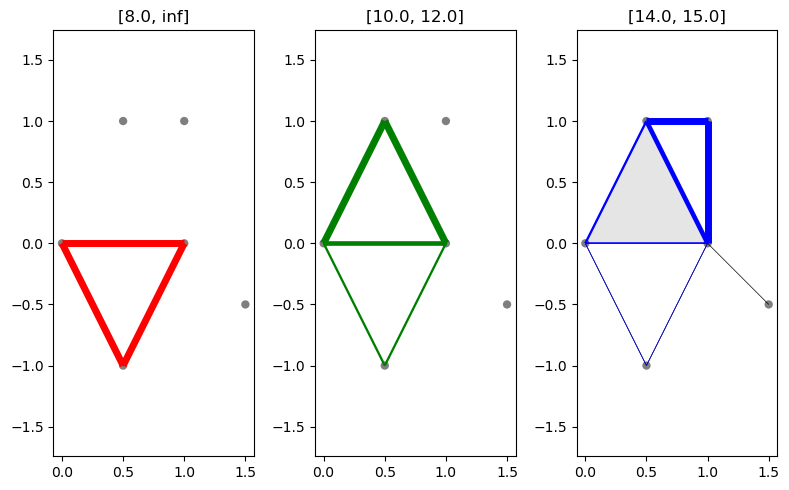

In [13]:
fig, axs = plt.subplots(ncols=3, figsize=(8, 5))

c = ["red", "green", "blue"]

for i, id in enumerate(harmonic_computer.harmonic_cycles[1].keys()):
    plotter.plot_2skel(
        K,
        max_id=id,
        pos={i: p for i, p in enumerate(coord_vertices)},
        vertices_color=["black"],
        t_alpha=0.2,
        this_ax=axs[i],
    )

    lines_0, w_0 = plotter.plot_1cycle(
        harmonic_computer.harmonic_cycles[1][id], K, coord_vertices
    )

    lg0 = matplotlib.collections.LineCollection(lines_0, color=c[i], linewidths=w_0 * 5)
    axs[i].add_collection(lg0)

    axs[i].axis("equal")
    axs[i].set_title(homology_computer.bars[1][id])

plt.tight_layout()
if SAVEFIG:
    plt.savefig("{}_points_matilda.pdf".format(len(pointcloud)))
plt.show()
